In [1]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [2]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('mauna_loa')

In [3]:
def kernel(x,z) :
    
    return 1 + np.dot(x,z) + np.dot(x,z)**2 + np.dot(np.cos(110.19*x),np.cos(110.19*z)) + np.dot(np.sin(110.19*x),np.sin(110.19*z))

In [4]:
def RMSE(yReal, yPredicted):
    return np.sqrt(np.average((yReal-yPredicted)**2))

In [5]:
n = len(x_train)
kvalues = list(range(1,50))
val_error = []
min_error = float('inf')

#Gram matrix 

Gram = np.zeros([n,n])

#I want to vectorize
for i in range(n):
    for j in range(n):
        Gram[i][j] = kernel(x_train[i],x_train[j])
# print(Gram)

kx = np.zeros([len(x_valid),n])
for i in range(len(x_valid)):
    x = x_valid[i]
    for j in range(n):
        kx[i][j] = kernel(x,x_train[j])


for k in kvalues:


    R = np.linalg.cholesky((Gram + k*np.identity(n)))
    Rinv = np.linalg.inv(R)
    alpha = np.dot(Rinv.T, Rinv)
    alpha = np.dot(alpha,y_train)

    y_val_predicted = np.dot(kx,alpha)
    
    error_val = RMSE(y_valid,y_val_predicted)
    
    if error_val < min_error:
        min_error = error_val
        alpha_min = alpha
    
    
    val_error.append(error_val) 


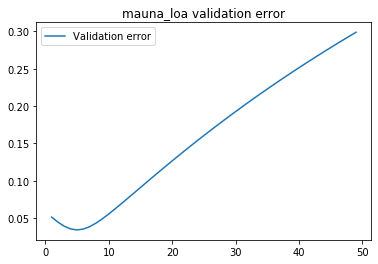

0.034274153042368354
4


In [6]:
plt.plot(kvalues,val_error)
plt.legend(['Validation error', 'Test error'])
plt.title('mauna_loa validation error')
plt.show()
print(np.min(val_error))
print(np.argmin(val_error))

In [7]:
x_all = np.vstack([x_valid,x_train,x_test])
y_all = np.vstack([y_valid,y_train,y_test])

kxPredict = np.zeros([len(x_all),n])
for i in range(len(x_all)):
    x = x_all[i]
    for j in range(n):
        kxPredict[i][j] = kernel(x,x_train[j])

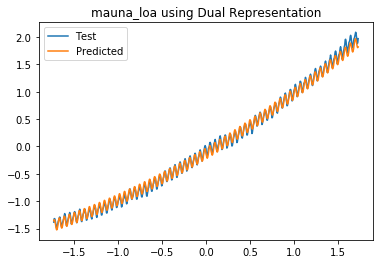

In [8]:
y_predicted = np.dot(kxPredict,alpha_min)

plt.plot(x_all,y_all,x_all,y_predicted)
plt.legend(['Test', 'Predicted'])
plt.title('mauna_loa using Dual Representation')
plt.show()

In [9]:
#visualze kernel

test0z = np.arange(-.1,.1,0.01)
test1z1 = np.arange(.9,1.1,0.01)
print(test0z.shape)
print(test1z1.shape)



result0z = []
result1z1 = []

for i in range(len(test0z)):
    result0z.append(kernel(0,test0z[i]))
for i in range(len(test1z1)):
    result1z1.append(kernel(1,test1z1[i]))

(20,)
(21,)


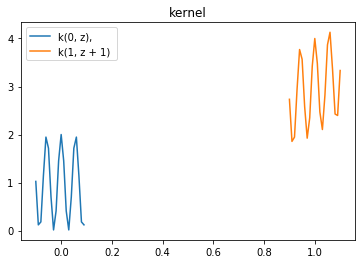

In [10]:
plt.plot(test0z,result0z,test1z1,result1z1)
plt.legend(['k(0, z), ', 'k(1, z + 1) '])
plt.title('kernel')
plt.show()